# Text Mining(Elon_musk)

In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [111]:
data=pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")

In [112]:
pd.set_option("display.max_rows",None)
data 

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
5              6  Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6              7  Frodo was the underdoge,\nAll thought he would...
7              8     @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8              9  @flcnhvy @anonyx10 Indeed! Tweets definitely d...
9             10   The most entertaining outcome is the most likely
10            11                       @GiveDirectly Just sent some
11            12         Just agree to do Clubhouse with @kanyewest
12            13                            https://t.co/3rWE9uHSTS
13            14     @geoffkeighley @UnrealEngine Its getting real
14            15  Bought some Dogecoin for lil X, so he can be a...
15            16  @JoshManMode He definitely has issues, but the...
16            17                   @freewalletorg Thanks for fixing
17            18            @freewalletorg Please unlock my account
18            19               @AstroJordy <U+0001F923><U+0001F923>
19            20    This is true power haha https://t.co/Fc9uhQSd7O
20            21  @freewalletorg Any crypto wallet that wont gi...
21            22                      @freewalletorg Your app sucks
22            23  RT @SpaceX: NASA has selected Falcon Heavy to ...
23            24                                   @ajtourville Yes
24            25  @BLKMDL3 @RationalEtienne @Adamklotz_ Once we ...
25            26  @RationalEtienne @Adamklotz_ Starlink is a sta...
26            27  @RationalEtienne @Adamklotz_ SpaceX needs to p...
27            28  @ID_AA_Carmack Lowest cost per ton of carbon s...
28            29  @Adamklotz_ Its meant to be the same price in...
29            30  @tobyliiiiiiiiii This is intended for Earth, b...
30            31  @CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer ...
31            32  XPrize team will manage the $100M carbon captu...
32            33  @SRuhle Everyone at Tesla receives stock. \n\n...
33            34                                Back to work I go 

34            35  @CapybaraSurfer @MattWallace888 Does seem a bi...
35            36  @itsALLrisky Doge appears to be inflationary, ...
36            37                    @MichaelGalanin @kevinmgill Wow
37            38  @Erdayastronaut @michaelhodapp_ 1. Orbital lau...
38            39              @michaelhodapp_ Back to work tonight!
39            40  Ð is for Ðogecoin! Instructional video.\nhttps...
40            41   The people have spoken 
 https://t.co/x41oVMzTGo
41            42     @Nivetha_7_42 @lexfridman So cute <U+0001F495>
42            43  @UniverCurious Extremely misleading image, as ...
43            44     <U+0001F3B6> Who let the Doge out <U+0001F3B6>
44            45                             Hodl the rainforests!!
45            46  So 
 its finally come to this 
 https://t.co/...
46            47             @itsALLrisky Its the most fun crypto!
47            48  @JoshRoomsburg @SnoopDogg @genesimmons Its sim...
48            49                          @astro_g_dogg @SpaceX Yup
49            50  @Jbuttermost @Dogecoinrich <U+0001F923><U+0001...
50            51                                @wapodavenport True
51            52             @Dogecoinrich <U+0001F923><U+0001F923>
52            53  @flcnhvy @AstroJordy Not that easy. This is tw...
53            54                                    @AstroJordy Yes
54            55                                    Lessons learned
55            56                                  Of Earth and Mars
56            57       Time to tell the story of Tesla &amp; SpaceX
57            58  @TheOnion Have you read @TheBabylonBee? Its

In [113]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
5     Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6     Frodo was the underdoge,\nAll thought he would...
7        @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8     @flcnhvy @anonyx10 Indeed! Tweets definitely d...
9      The most entertaining outcome is the most likely
10                         @GiveDirectly Just sent some
11           Just agree to do Clubhouse with @kanyewest
12                              https://t.co/3rWE9uHSTS
13       @geoffkeighley @UnrealEngine Its getting real
14    Bought some Dogecoin for lil X, so he can be a...
15    @JoshManMode He definitely has issues, but the...
16                     @freewalletorg Thanks for fixing
17              @freewalletorg Please unlock my account
18                 @AstroJordy <U+0001F923><U+0001F923>
19      This is true power haha https://t.co/Fc9uhQSd7O
20    @freewalletorg Any crypto wallet that wont gi...
21                        @freewalletorg Your app sucks
22    RT @SpaceX: NASA has selected Falcon Heavy to ...
23                                     @ajtourville Yes
24    @BLKMDL3 @RationalEtienne @Adamklotz_ Once we ...
25    @RationalEtienne @Adamklotz_ Starlink is a sta...
26    @RationalEtienne @Adamklotz_ SpaceX needs to p...
27    @ID_AA_Carmack Lowest cost per ton of carbon s...
28    @Adamklotz_ Its meant to be the same price in...
29    @tobyliiiiiiiiii This is intended for Earth, b...
30    @CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer ...
31    XPrize team will manage the $100M carbon captu...
32    @SRuhle Everyone at Tesla receives stock. \n\n...
33                                  Back to work I go 

34    @CapybaraSurfer @MattWallace888 Does seem a bi...
35    @itsALLrisky Doge appears to be inflationary, ...
36                      @MichaelGalanin @kevinmgill Wow
37    @Erdayastronaut @michaelhodapp_ 1. Orbital lau...
38                @michaelhodapp_ Back to work tonight!
39    Ð is for Ðogecoin! Instructional video.\nhttps...
40     The people have spoken 
 https://t.co/x41oVMzTGo
41       @Nivetha_7_42 @lexfridman So cute <U+0001F495>
42    @UniverCurious Extremely misleading image, as ...
43       <U+0001F3B6> Who let the Doge out <U+0001F3B6>
44                               Hodl the rainforests!!
45    So 
 its finally come to this 
 https://t.co/...
46               @itsALLrisky Its the most fun crypto!
47    @JoshRoomsburg @SnoopDogg @genesimmons Its sim...
48                            @astro_g_dogg @SpaceX Yup
49    @Jbuttermost @Dogecoinrich <U+0001F923><U+0001...
50                                  @wapodavenport True
51               @Dogecoinrich <U+0001F923><U+0001F923>
52    @flcnhvy @AstroJordy Not that easy. This is tw...
53                                      @AstroJordy Yes
54                                      Lessons learned
55                                    Of Earth and Mars
56         Time to tell the story of Tesla &amp; SpaceX
57    @TheOnion Have you read @TheBabylonBee? Its g...
58      The Second Last Kingdom https://t.co/Je4EI88HmV
59    @DumDin7 @Grimezsz Havent heard that name in ...
60                                   @Grimezsz Dogecake
61                      YOLT\n\nhttps://t.co/cnOf9yjpF1
62                         @Kristennetten Thats Damian
63                                  @Kristennetten Yeah
64                                    @OwenSparks_ Sure
65    The great thing about restaurants is that you ...
66                         The future currency of Earth
67                       @redlineshifter Just a scratch
68                                            Much wow!
69                        @RationalEtienne <U+0001F5A4>
70                             @wonderofscience Destiny
71    @RenataKonkol

## Text Processing

In [114]:
data=[Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [115]:
# Joining the list into one string/text
data_text=' '.join(data)
data_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [116]:
#Punctuation
no_punc_text = data_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [117]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [118]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pavani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pavani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil'

In [120]:
# Tokens count
len(text_tokens)

20423

In [121]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001

In [122]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001

In [123]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'cr

In [124]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predic

In [125]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyew', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true', '

In [126]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyew geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasonably

# 1. Feature Extraction
## 1.1 CountVectorizer

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [128]:
print(vectorizer.vocabulary_)

{'kunalb11': 2048, 'alien': 229, 'idaacarmack': 1785, 'ray': 2952, 'trace': 3823, 'cyberpunk': 962, 'hdr': 1672, 'nextlevel': 2492, 'have': 1666, 'try': 3857, 'joerogan': 1967, 'spotify': 3449, 'great': 1605, 'interview': 1895, 'gtera27': 1624, 'doge': 1114, 'underestimate': 3987, 'teslacn': 3670, 'congratulation': 855, 'tesla': 3664, 'china': 740, 'amazing': 254, 'execution': 1325, 'last': 2066, 'year': 4259, 'now': 2532, 'next': 2491, 'even': 1295, 'happy': 1653, 'new': 2488, 'ox': 2649, 'frodo': 1489, 'underdoge': 3986, 'all': 231, 'thought': 3748, 'would': 4234, 'fail': 1361, 'himself': 1718, 'owenspark': 2646, 'flcnhvy': 1432, 'anonyx10': 283, 'haha': 1639, 'thanks': 3707, 'indeed': 1834, 'tweet': 3876, 'definitely': 1016, 'represent': 3036, 'realworld': 2977, 'time': 3766, 'allocation': 233, 'the': 3714, 'entertaining': 1252, 'outcome': 2626, 'likely': 2126, 'givedirectly': 1574, 'just': 1995, 'send': 3220, 'agree': 200, 'clubhouse': 781, 'kanyew': 2004, 'geoffkeighley': 1553, 'u

In [129]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray())

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [130]:
print(X.toarray().shape)

(15123, 4292)


## 1.2 CountVectorizer with N-grams (Bigrams & Trigrams)

In [131]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [132]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'big', 'car', 'cleantechnica', 'come', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yea

## 1.3 TF-IDF Vectorizer

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [134]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '28delayslater', '30', '60', 'able', 'absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'design', 'didn', 'difference', 'different', 'djsnm', 'dmcry

## Generate Word Cloud

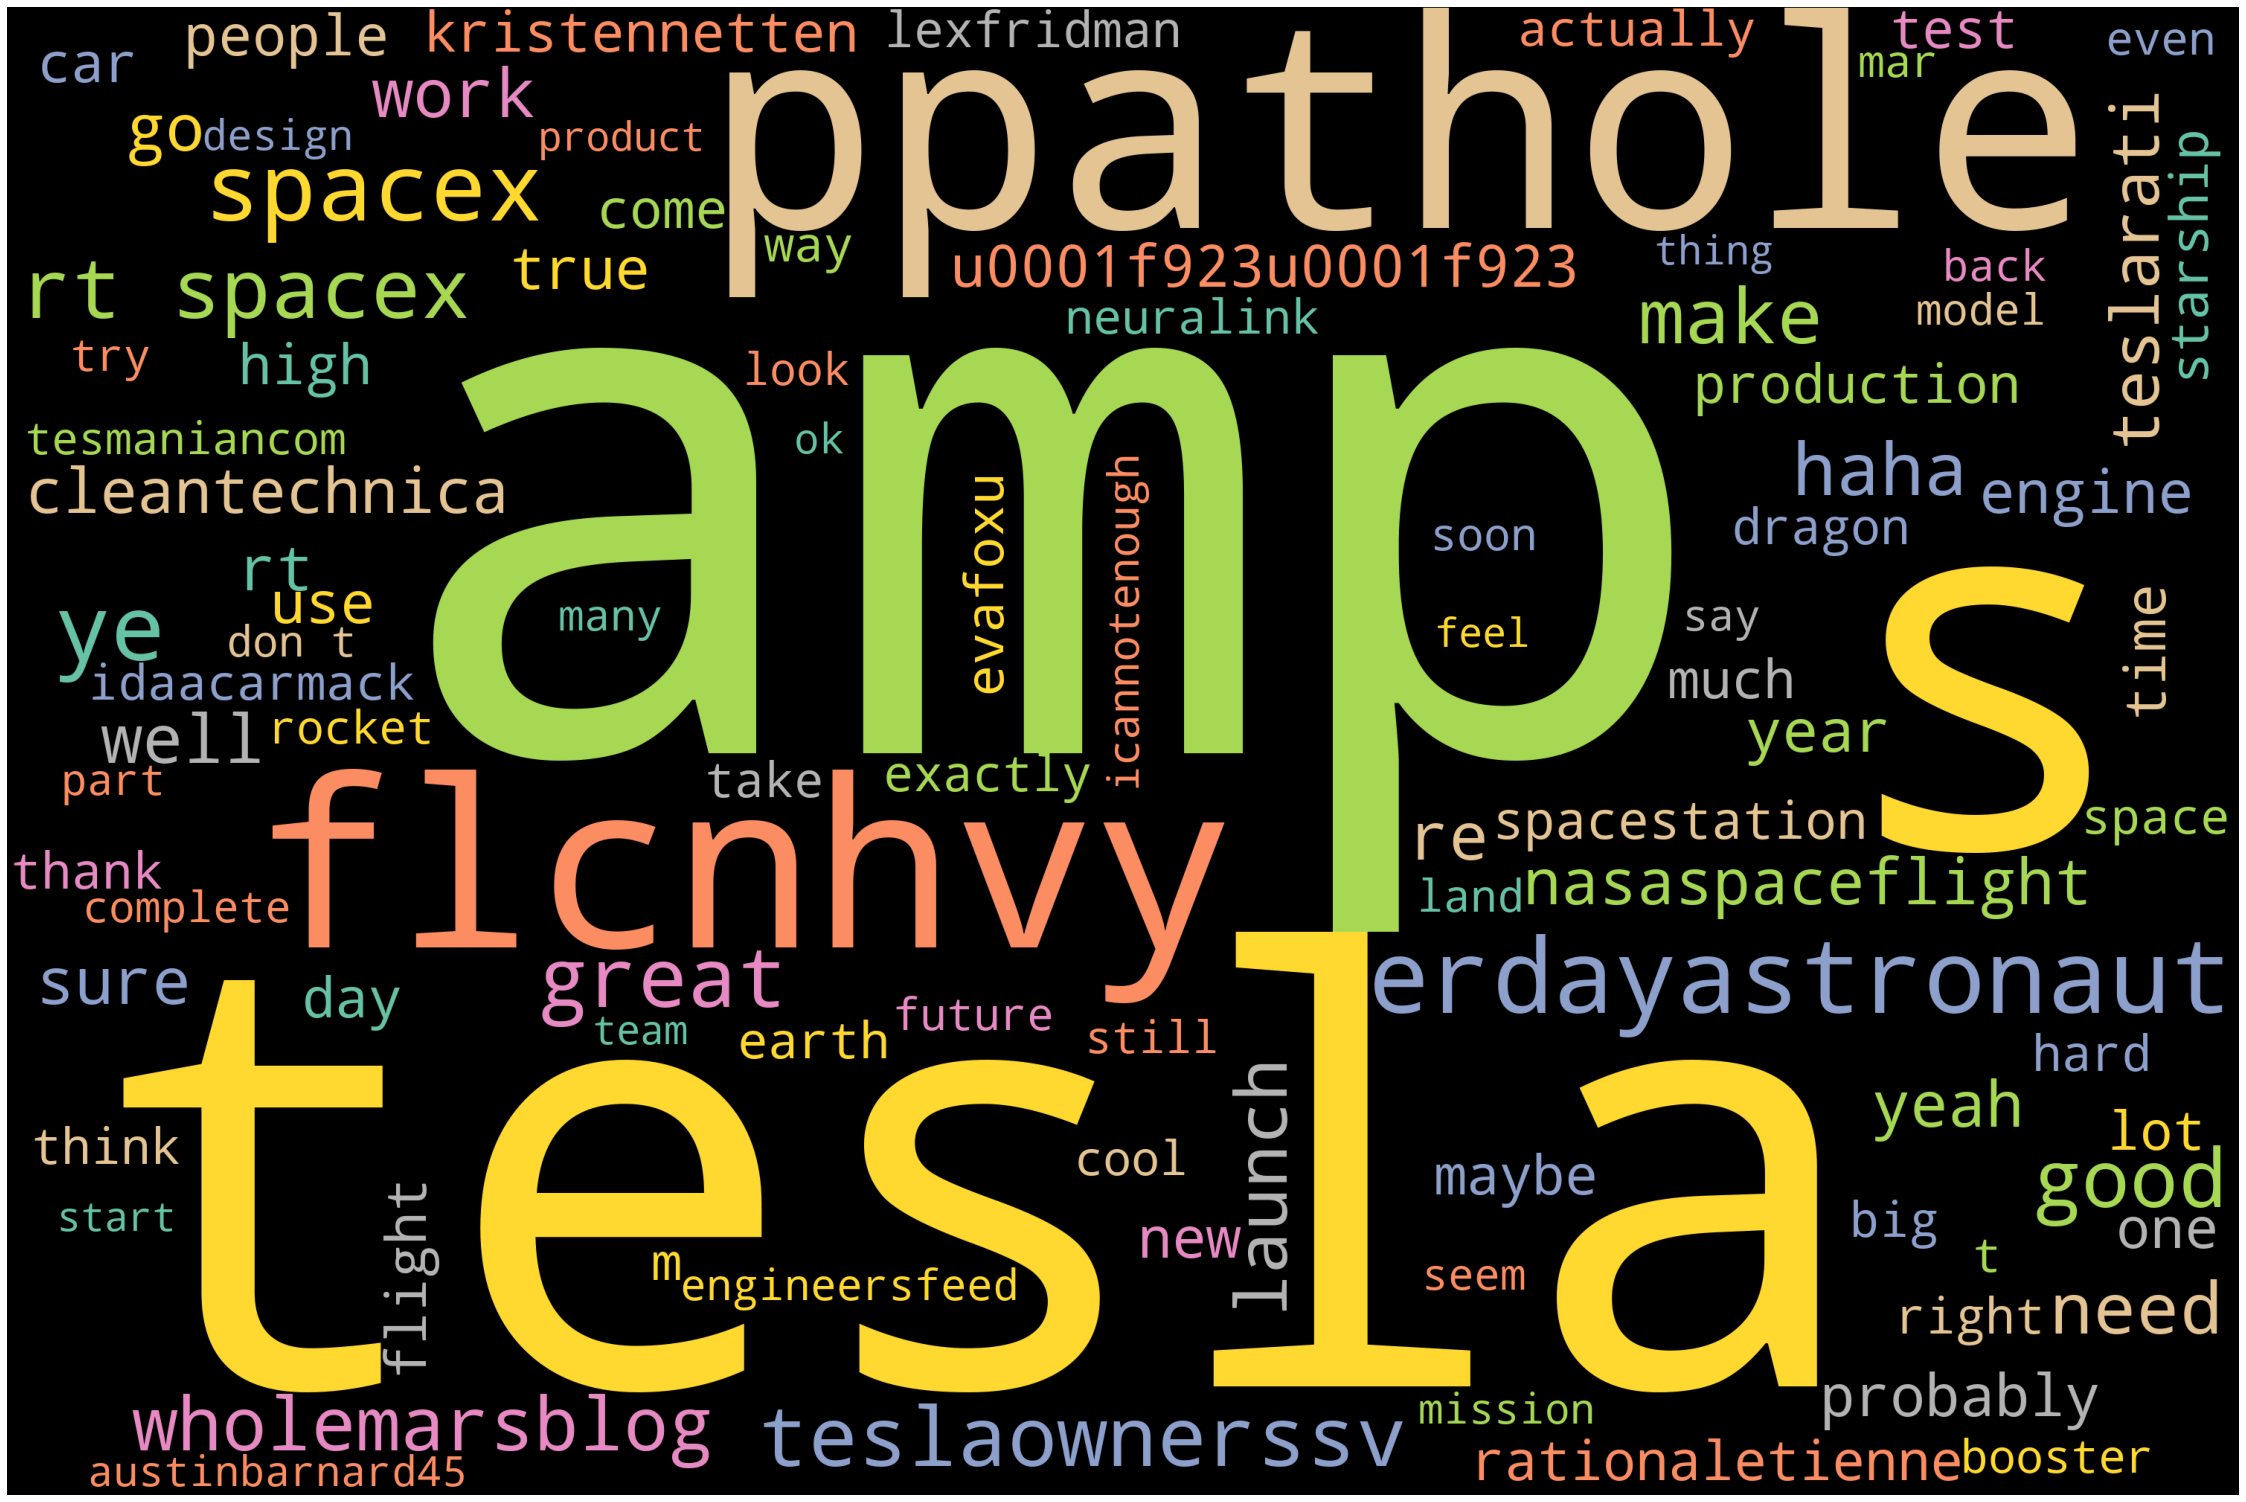

In [135]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweets)
# Plot
plot_cloud(wordcloud)

# 2. Named Entity Recognition

In [136]:
##Part Of Speech Tagging

nlp = spacy.load("en_core_web_sm")
one_block =clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [137]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien ADJ
idaacarmack PROPN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate PROPN
teslacn PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge PROPN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha VERB
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send VERB
just ADV
agree ADJ
clubhouse NOUN
kanyew PROPN
geoffkeighley PROPN
unrealengine ADJ
its PROPN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x NOUN
toddler NOUN
hodler NOUN
joshmanmode NOUN
he PRON
definitely ADV
issue VERB
sentencing NOUN
see

In [138]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['ray', 'trace', 'cyberpunk', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'haha', 'represent', 'time', 'allocation', 'outcome', 'send', 'clubhouse', 'get', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentencing', 'seem', 'thank', 'fix', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'power', 'haha', 'freewalletorg', 'wallet', 'won\x92t', 'give', 'key', 'avoid', 'cost', 'app', 'suck', 'spacex', 'launch', 'element', 'gateway', 'mission', 'blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'adamklotz', 'starlink', 'amp', 'endeavor', 'adamklotz', 'pass', 'chasm', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'g', 'adamklotz', 'it\x92s', 'price', 'country', 'difference', 'taxis', 'amp', 'shipping', 'tobyliiiiiiiiii', 'earth', 'idea', 'apply', 'tesla', 'danzpalmer', 'xprize', 'team', 'manage', 'm', 'carbon', 

In [139]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

word  count
0                                  spacex    215
1                                     amp    182
2                                   tesla     91
3                                ppathole     86
4                                    make     63
5                                  launch     60
6                          erdayastronaut     60
7                           wholemarsblog     50
8                                    year     48
9                                    need     46
10                                   work     45
11                        nasaspaceflight     45
12                                     go     44
13                          teslaownerssv     43
14                              teslarati     42
15                                   come     38
16                                    get     37
17                                    day     37
18                                 engine     36
19                                 dragon     36
20                                   haha     34
21                                   time     34
22                                    use     34
23                                   test     32
24                                 people     31
25                          kristennetten     31
26                               starship     31
27                                 flight     31
28                                    car     30
29                            idaacarmack     29
30                                    lot     29
31                                   land     27
32                             production     27
33                           spacestation     27
34                              ercxspace     25
35                                  earth     24
36                                mission     23
37                                  think     23
38                                  thank     22
39                                   take     22
40                                   crew     21
41                        marcushousegame     21
42                                   week     21
43                              neuralink     20
44                                  space     20
45                                  model     20
46                                     it     19
47                                booster     19
48                             lexfridman     19
49                                   look     19
50                                 rocket     19
51                                    way     19
52                                   seem     18
53                               starlink     18
54                                 falcon     18
55                                  point     18
56                                    try     17
57                                    say     17
58                                   love     17
59                                   part     17
60                                product     16
61                                  thing     16
62                                   feel     16
63                                 design     16
64                                  month     16
65                                   life     16
66                           berniesander     16
67                                 raptor     15
68                                  start     15
69                                    fsd     15
70                                   fire     15
71                                   give     14
72                                   team     14
73                                version     14
74                                  sound     14
75                                   game     14
76                            engineering     14
77                            improvement     14
78                                   ship     13
79                                company     13
80                                    see     13
81                 

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

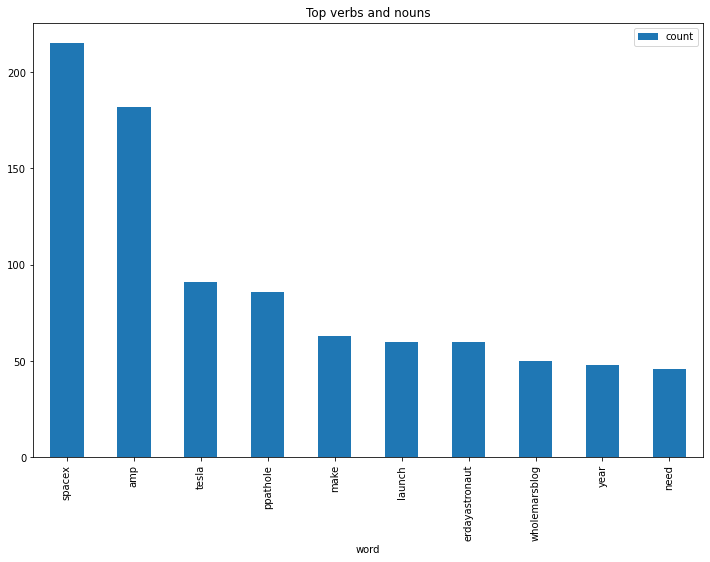

In [140]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## 2.1 Emotion Mining - Sentiment Analysis

In [141]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(data))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [142]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
5                            Happy New Year of the Ox!
6    https://t.co/9WFKMYu2oj Frodo was the underdog...
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...
8    Tweets definitely do not represent real-world ...
9    The most entertaining outcome is the most like...
10   https://t.co/3pWt @ajtourville Yes @BLKMDL3 @R...
11   However, if we don
 https://t.co/9Z8Ac6skqx @R...
12   Must be scalable to g
 https://t.co/XMyI7qWSgw...
13     Only difference should be taxes &amp; shipping.
14   @tobyliiiiiiiiii This is intended for Earth, b...
15   My comp is all stock/options, which I do not t...
16                         Thats what youre missing.
17   Back to work I go @CapybaraSurfer @MattWallace...
18             Orbital launch tower that can stack\n2.
19                Enough Raptors for orbit booster\n3.
20   Improve ship &amp; booster mass @michaelhodapp...
21                                  Ð is for Ðogecoin!
22                                Instructional video.
23   https://t.co/UEEocOfcTb The people have spoken...
24   So 
 its finally come to this 
 https://t.co/...
25   @JoshRoomsburg @SnoopDogg @genesimmons Its sim...
26                This is two decades of intense work.
27           Have to look at old notes, emails, texts.
28   @AstroJordy Yes Lessons learned Of Earth and M...
29                                        Its great!!
30   The Second Last Kingdom https://t.co/Je4EI88Hm...
31   - SJM The future currency of Earth @redlineshi...
32   @RationalEtienne <U+0001F5A4> @wonderofscience...
33   My greate
 https://t.co/e5Wikiugkz @Adamklotz_...
34   @josh_bickett @ajtourville @Erdayastronaut @Sp...
35   By default, engine with least lever arm would ...
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...
37   Short-term: solve brain/spine injuries\nLong-t...
38   Tom certainly deserves a lot of cre
 https://t...
39   High T/W is important for reusable v
 https://...
40                      He gave a talk at SpaceX once.
41   @flcnhvy Only Halo https://t.co/pyRCFE97Xp @Ca...
42   @thejackbeyer @NASASpaceflight Cryoproof, then...
43                                   SpaceX used them.
44   @ohqwix @BnnJ6bCghvzQxLb <U+0001F923><U+0001F9...
45   The economy  making useful products &amp; pro...
46        @Iupsychdoctor @AOC @RobinhoodApp TANSTAAFL.
47   Would be better to have small fees than no fee...
48   this is bs  sh
 https://t.co/vJkf9BqbOD @Rati...
49   Aiming to have release candidate desig
 https:...
50   @AOC @RobinhoodApp Absolutely @NASASpaceflight...
51                 The interior design is<U+0001F44C>.
52   @TrevorMahlmann @SpaceX Major esthetics improv...
53                      @WholeMarsBlog No more stalks.
54   Car guesses drive direction based on what obst...
55   You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
56                200mph top speed (with right tires).
57   First production car ever to achieve 0 to 60 m...
58                         Wild times on Discord haha.
59   https://t.co/F23fxQkBCE @AndyColt2 Waiting for...
60   https://t.co/RZtkDzAewJ @LabPadre Passed initi...
61   Th
 https://t.co/u90Sqjkn8U @flcnhvy @WholeMar...
62           This will enable superhuman self-driving.
63                              @naval [Some tyranny].
64   Also, the road to hell is mostly paved with ba...
65                                     @levine Catchy!
66   https://t.co/Au32MYF2Rn @Megaconstellati @Avia...
67   Only o
 https://t.co/CeoFLi8Lzm @Megaconstella...
68                 V8.1 is what it should say for FSD.
69            Separate version number for rest of car.
70   @cleantechnica To my surprise, Tesla has bette...
71   @Alex_E_Benton @boringcompany <U+0001F923><U+0...
72   https://t.co/js3zVM77rH @C

In [143]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0                abandon     -2
1              abandoned     -2
2               abandons     -2
3               abducted     -2
4              abduction     -2
5             abductions     -2
6                  abhor     -3
7               abhorred     -3
8              abhorrent     -3
9                 abhors     -3
10             abilities      2
11               ability      2
12                aboard      1
13              absentee     -1
14             absentees     -1
15               absolve      2
16              absolved      2
17              absolves      2
18             absolving      2
19              absorbed      1
20                 abuse     -3
21                abused     -3
22                abuses     -3
23               abusive     -3
24                accept      1
25              accepted      1
26             accepting      1
27               accepts      1
28              accident     -2
29            accidental     -2
30          accidentally     -2
31             accidents     -2
32            accomplish      2
33          accomplished      2
34          accomplishes      2
35            accusation     -2
36           accusations     -2
37                accuse     -2
38               accused     -2
39               accuses     -2
40              accusing     -2
41                  ache     -2
42            achievable      1
43                aching     -2
44                acquit      2
45               acquits      2
46             acquitted      2
47            acquitting      2
48           acrimonious     -3
49                active      1
50              adequate      1
51                admire      3
52               admired      3
53               admires      3
54              admiring      3
55                 admit     -1
56                admits     -1
57              admitted     -1
58              admonish     -2
59            admonished     -2
60                 adopt      1
61                adopts      1
62              adorable      3
63                 adore      3
64                adored      3
65                adores      3
66              advanced      1
67             advantage      2
68            advantages      2
69             adventure      2
70            adventures      2
71           adventurous      2
72              affected     -1
73             affection      3
74          affectionate      3
75             afflicted     -1
76             affronted     -1
77                afraid     -2
78             aggravate     -2
79            aggravated     -2
80            aggravates     -2
81           aggravating     -2
82            aggression     -2
83           aggressions     -2
84            aggressive     -2
85                aghast     -2
86                  agog      2
87               agonise     -3
88              agonised     -3
89              agonises     -3
90             agonising     -3
91               agonize     -3
92              agonized     -3
93              agonizes     -3
94             agonizing     -3
95                 agree      1
96             agreeable      2
97                agreed      1
98             agreement      1
99                agrees      1
100                alarm     -2
101              alarmed     -2
102             alarmist     -2
103            alarmists     -2
104                 alas     -1
105                alert     -1
106           alienation     -2
107                alive      1
108             allergic     -2
109                allow      1
110                alone     -2
111                amaze      2
112               amazed      2
113               amazes      2
114              amazing      4
115            ambitious      2
116           ambivalent     -1
117                amuse      3
118               amused      3
119            amusement      3
120           amusements      3
121                anger     -3
122               angers     -3
123                angry     -3
124              ang

In [144]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [145]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [146]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [147]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [148]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       13
1        4
2        4
3       13
4        8
5        6
6       14
7       10
8        8
9      109
10      28
11      40
12      17
13       7
14      38
15      13
16       4
17      38
18       7
19       6
20      10
21       4
22       2
23      37
24      13
25      23
26       7
27       8
28      22
29       2
30      38
31      13
32      24
33      89
34       5
35      15
36     231
37      79
38      36
39      46
40       7
41      15
42      84
43       3
44       6
45      15
46       4
47      48
48      18
49      13
50      32
51       4
52      62
53       4
54      14
55      30
56       6
57      33
58       5
59       7
60      76
61      27
62       5
63       3
64      11
65       2
66      14
67      39
68       8
69       7
70      31
71      56
72      20
73      59
74      23
75      83
76       2
77     109
78       8
79      14
80      10
81      38
82       4
83      41
84      20
85      14
86       8
87      33
88      40
89      11
90       8

In [149]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -7   
611  Then static fire, checkouts, static fire, fly ...               -4   
920  It may never pay out, as the stock cant b
 ht...               -4   
680  Occasional flights from land are ok, but frequ...               -4   
380  No problem if theres a way get current design...               -3   
729                                    Those worry me.               -3   
481  Pretty odd
 https://t.co/PPSorKWdI8 @enn_nafnl...               -3   
216  RT @boringcompany: Tunnel Rave https://t.co/d3...               -3   
630                        You are a modern day moron.               -3   
480  He plays the poor inventor card, but was ric...               -3   
219  @RGVaerialphotos It will be real soon @MarcusH...               -3   
744  @TimFernholz So why is this madness acceptable...               -3   
220  External
 https://t.co/csIZk6sEVu @bcart03 @ne...               -3   
233  @RationalEtienne @MarcusHouseGame Not yet @Sta...               -3   
296  No symptoms for past few days, apart from fati...               -3   
816     Connector damaged in the storm, but fixed now.               -3   
90     All three static fires completed &amp; no RUDs!               -3   
541  We are prioritizing emergency responders &amp;...               -3   
436  @SpaceX Just a small-seeming issue with loss o...               -3   
887  Will those who write the algorithms ever reali...               -3   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
283  Production/testing of rocket engines is over 9...               -3   
503  @raytech247 @WholeMarsBlog Even GM &amp; Chrys...               -3   
718  That bs has been pushed by Eberhard (worst per...               -3   
329  Their main PCR search is for the N1 gene, uniq...               -3   
11   However, if we don
 https://t.co/9Z8Ac6skqx @R...               -3   
354  Austin jobs now avai https://t.co/d0i2w8wNKG Y...               -3   
500  @tesladri @ChananBos @raytech247 @WholeMarsBlo...               -3   
254                       They stole Apples code too.               -2   
265  They have no point in &amp; of thems
 https://...               -2   
489    We barked up that tree for way too long (sigh).               -2   
54   Car guesses drive direction based on what obst...               -2   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
131  Destiny, destiny\nNo escaping \nthat for me Al...               -2   
592  <U+0001F5A4> Fallout Radio  <U+0001F5A4>\nhttp...               -2   
907  Technically,
 https://t.co/TcIVzvc5RA @MightyT...               -2   
654  It is impossible until you understand it, and ...               -2   
516  https://t.co/on2f1pY5jt @cleantechnica So craz...               -2   
814        Also, some odd TVC hydraulic pump behavior.               -2   
161                      What could possibly go wrong?               -2   
446  We also have to consider population life-month...               -2   
341  Two tests came back negative, two cam
 https:/...               -2   
798  Some go several seconds to minutes without fir...               -2   
797        @Neuro_Skeptic They dont fire all at once.               -2   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
108  A large solar field or reactor is needed for p...               -2   
506        Fully burdened cost depends on flight rate.               -2   
16                         Thats what youre missing.               -2   
486  @johnkrausphotos @Patreon @SuperclusterHQ @Spa...               -2   
642  Its when you hang out there that problems arise.               -2   
728  @GiulioCoraggio Absolutely, but it doesnt see...               -2

In [150]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [151]:
# negative Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
8    Tweets definitely do not represent real-world ...                0   
10   https://t.co/3pWt @ajtourville Yes @BLKMDL3 @R...                0   
11   However, if we don
 https://t.co/9Z8Ac6skqx @R...               -3   
12   Must be scalable to g
 https://t.co/XMyI7qWSgw...                0   
13     Only difference should be taxes &amp; shipping.                0   
14   @tobyliiiiiiiiii This is intended for Earth, b...                0   
15   My comp is all stock/options, which I do not t...                0   
16                         Thats what youre missing.               -2   
18             Orbital launch tower that can stack\n2.                0   
19                Enough Raptors for orbit booster\n3.                0   
21                                  Ð is for Ðogecoin!                0   
22                                Instructional video.                0   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
27           Have to look at old notes, emails, texts.                0   
28   @AstroJordy Yes Lessons learned Of Earth and M...                0   
34   @josh_bickett @ajtourville @Erdayastronaut @Sp...                0   
40                      He gave a talk at SpaceX once.                0   
43                                   SpaceX used them.                0   
44   @ohqwix @BnnJ6bCghvzQxLb <U+0001F923><U+0001F9...                0   
46        @Iupsychdoctor @AOC @RobinhoodApp TANSTAAFL.                0   
47   Would be better to have small fees than no fee...               -2   
49   Aiming to have release candidate desig
 https:...                0   
51                 The interior design is<U+0001F44C>.                0   
53                      @WholeMarsBlog No more stalks.               -1   
54   Car guesses drive direction based on what obst...               -2   
55   You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...               -1   
57   First production car ever to achieve 0 to 60 m...                0   
59   https://t.co/F23fxQkBCE @AndyColt2 Waiting for...                0   
61   Th
 https://t.co/u90Sqjkn8U @flcnhvy @WholeMar...               -1   
62           This will enable superhuman self-driving.                0   
63                              @naval [Some tyranny].                0   
64   Also, the road to hell is mostly paved with ba...               -7   
65                                     @levine Catchy!                0   
66   https://t.co/Au32MYF2Rn @Megaconstellati @Avia...                0   
68                 V8.1 is what it should say for FSD.                0   
69            Separate version number for rest of car.                0   
72   https://t.co/js3zVM77rH @CodeWisdom <U+0001F4A...                0   
76                                          They rock.                0   
79   No question that FSD should be viewed as reaso...               -1   
86                    Needs to be a few hours at most.                0   
87   @PPathole @johnkrausphotos @SpaceX Two of the ...                0   
90     All three static fires completed &amp; no RUDs!               -3   
91   @justpaulinelol @Erdayastronaut @SpaceX Wow, a...                0   
93   Ship is held down by massive pins while engine...                0   
95   @SpaceX @Space_Station One day, we will get a ...                0   
100                                  Will donate more.                0   
104                             Let us all make it so.                0   
108  A large solar field or reactor is needed for p...               -2

In [152]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                3   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
20   Improve ship &amp; booster mass @michaelhodapp...                2   
24   So 
 its finally come to this 
 https://t.co/...                4   
25   @JoshRoomsburg @SnoopDogg @genesimmons Its sim...                1   
26                This is two decades of intense work.                1   
29                                        Its great!!                3   
30   The Second Last Kingdom https://t.co/Je4EI88Hm...                4   
31   - SJM The future currency of Earth @redlineshi...                4   
32   @RationalEtienne <U+0001F5A4> @wonderofscience...                2   
33   My greate
 https://t.co/e5Wikiugkz @Adamklotz_...                1   
35   By default, engine with least lever arm would ...                3   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
37   Short-term: solve brain/spine injuries\nLong-t...                5   
38   Tom certainly deserves a lot of cre
 https://t...                3   
39   High T/W is important for reusable v
 https://...                5   
41   @flcnhvy Only Halo https://t.co/pyRCFE97Xp @Ca...                2   
42   @thejackbeyer @NASASpaceflight Cryoproof, then...                9   
45   The economy  making useful products &amp; pro...                6   
48   this is bs  sh
 https://t.co/vJkf9BqbOD @Rati...                1   
50   @AOC @RobinhoodApp Absolutely @NASASpaceflight...                2   
52   @TrevorMahlmann @SpaceX Major esthetics improv...                2   
56                200mph top speed (with right tires).                2   
58                         Wild times on Discord haha.                3   
60   https://t.co/RZtkDzAewJ @LabPadre Passed initi...                7   
67   Only o
 https://t.co/CeoFLi8Lzm @Megaconstella...                1   
70   @cleantechnica To my surprise, Tesla has bette...                1   
71   @Alex_E_Benton @boringcompany <U+0001F923><U+0...                4   
73   https://t.co/QmHipv5zQs @NASASpaceflight Hopef...                2   
74   Excited about offering low-cost access to o
 h...                5   
75   We may need something thats
 https://t.co/FWX...                6   
77   <U+0001F5A4> RT @SpaceX: Falcon 9 launches Sta...                9   
78   Very important pr
 https://t.co/9ybABEzxCV @p_...                2   
80   @tobyliiiiiiiiii @Erdayastronaut For sure @Erd...                5   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
82                                  So glad you exist.                3   
83   @TheOnion Guess you been watching Cobra Kai @S...                3   
84   What actuall
 https://t.co/JZ6zmQGBO3 Monty Py...                4   
85   @tobyliiiiiiiiii @Erdayastronaut Probably wise...                4   
88   @skorusARK Prototypes are easy, volume product...                2   
89   Good progress towards our Hop in &amp; go to ...                5   
92   @OfficialJlipper Fair enough haha https://t.co...                3   
94                          Help would be appreciated.                4   
96   Dragon performing 3 departure burns to move aw...                1   
97   <U+0001F495><U+0001F495> https://t.co/LrqdIrbI...                1   
98            Theyre great places to get spare parts.                3   
99   @TheBabylonBee A lot of people are going to be...                2   
101  @benmezrich I am primarily trying to advance t...                1   
102  @BoredElonMusk <U+0001F923><U+0001F923> @erigg...                9   
103                                           I agree.                1

In [153]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
8    Tweets definitely do not represent real-world ...                0   
9    The most entertaining outcome is the most like...                3   
10   https://t.co/3pWt @ajtourville Yes @BLKMDL3 @R...                0   
11   However, if we don
 https://t.co/9Z8Ac6skqx @R...               -3   
12   Must be scalable to g
 https://t.co/XMyI7qWSgw...                0   
13     Only difference should be taxes &amp; shipping.                0   
14   @tobyliiiiiiiiii This is intended for Earth, b...                0   
15   My comp is all stock/options, which I do not t...                0   
16                         Thats what youre missing.               -2   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
18             Orbital launch tower that can stack\n2.                0   
19                Enough Raptors for orbit booster\n3.                0   
20   Improve ship &amp; booster mass @michaelhodapp...                2   
21                                  Ð is for Ðogecoin!                0   
22                                Instructional video.                0   
23   https://t.co/UEEocOfcTb The people have spoken...               -3   
24   So 
 its finally come to this 
 https://t.co/...                4   
25   @JoshRoomsburg @SnoopDogg @genesimmons Its sim...                1   
26                This is two decades of intense work.                1   
27           Have to look at old notes, emails, texts.                0   
28   @AstroJordy Yes Lessons learned Of Earth and M...                0   
29                                        Its great!!                3   
30   The Second Last Kingdom https://t.co/Je4EI88Hm...                4   
31   - SJM The future currency of Earth @redlineshi...                4   
32   @RationalEtienne <U+0001F5A4> @wonderofscience...                2   
33   My greate
 https://t.co/e5Wikiugkz @Adamklotz_...                1   
34   @josh_bickett @ajtourville @Erdayastronaut @Sp...                0   
35   By default, engine with least lever arm would ...                3   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
37   Short-term: solve brain/spine injuries\nLong-t...                5   
38   Tom certainly deserves a lot of cre
 https://t...                3   
39   High T/W is important for reusable v
 https://...                5   
40                      He gave a talk at SpaceX once.                0   
41   @flcnhvy Only Halo https://t.co/pyRCFE97Xp @Ca...                2   
42   @thejackbeyer @NASASpaceflight Cryoproof, then...                9   
43                                   SpaceX used them.                0   
44   @ohqwix @BnnJ6bCghvzQxLb <U+0001F923><U+0001F9...                0   
45   The economy  making useful products &amp; pro...                6   
46        @Iupsychdoctor @AOC @RobinhoodApp TANSTAAFL.                0   
47   Would be better to have small fees than no fee...               -2   
48   this is bs  sh
 https://t.co/vJkf9BqbOD @Rati...                1   
49   Aiming to have release candidate desig
 https:...                0   
50   @AOC @RobinhoodApp Absolutely @NASASpaceflight...                2   
51                 The interior design is<U+0001F44C>.                0   
52   @TrevorMahlmann @SpaceX Major esthetics improv...                2

C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

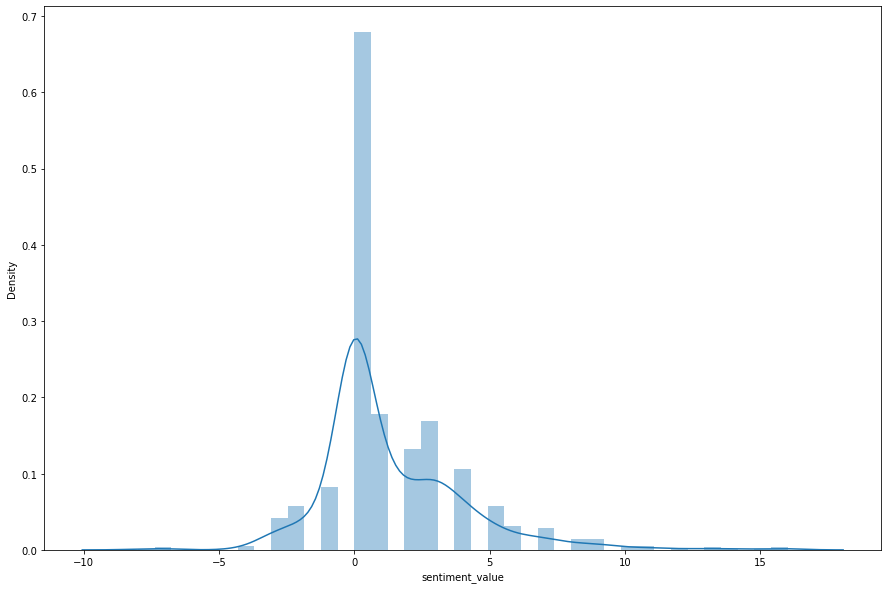

In [154]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

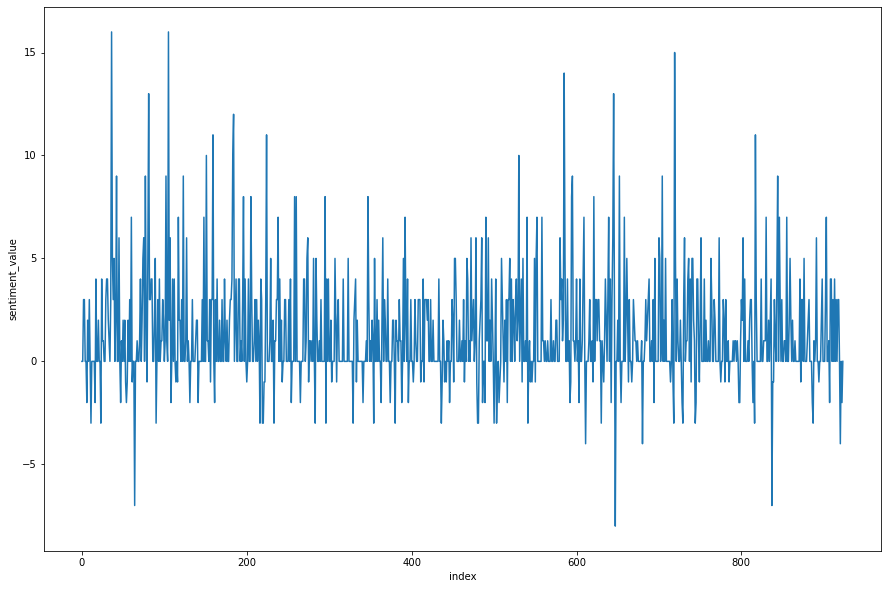

In [155]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

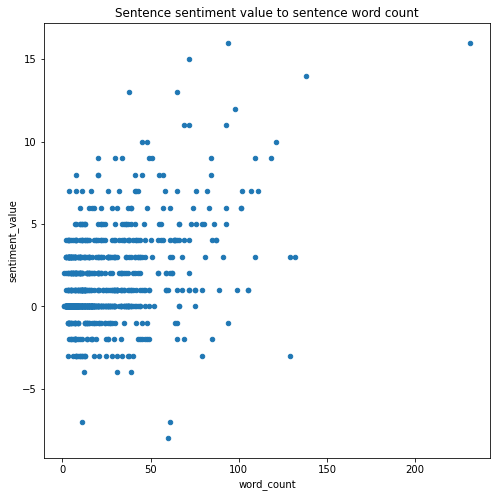

In [156]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')